In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data file
fuel = pd.read_csv("C:/Users/Owner/Documents/BAS=230/vehicles.csv", low_memory=False)

In [3]:
# view datasets
fuel.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [4]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41854 entries, 0 to 41853
Data columns (total 83 columns):
barrels08          41854 non-null float64
barrelsA08         41854 non-null float64
charge120          41854 non-null float64
charge240          41854 non-null float64
city08             41854 non-null int64
city08U            41854 non-null float64
cityA08            41854 non-null int64
cityA08U           41854 non-null float64
cityCD             41854 non-null float64
cityE              41854 non-null float64
cityUF             41854 non-null float64
co2                41854 non-null int64
co2A               41854 non-null int64
co2TailpipeAGpm    41854 non-null float64
co2TailpipeGpm     41854 non-null float64
comb08             41854 non-null int64
comb08U            41854 non-null float64
combA08            41854 non-null int64
combA08U           41854 non-null float64
combE              41854 non-null float64
combinedCD         41854 non-null float64
combinedUF         41

In [5]:
fuel.isnull().sum()

barrels08              0
barrelsA08             0
charge120              0
charge240              0
city08                 0
city08U                0
cityA08                0
cityA08U               0
cityCD                 0
cityE                  0
cityUF                 0
co2                    0
co2A                   0
co2TailpipeAGpm        0
co2TailpipeGpm         0
comb08                 0
comb08U                0
combA08                0
combA08U               0
combE                  0
combinedCD             0
combinedUF             0
cylinders            213
displ                211
drive               1189
engId                  0
eng_dscr           16255
feScore                0
fuelCost08             0
fuelCostA08            0
                   ...  
rangeCity              0
rangeCityA             0
rangeHwy               0
rangeHwyA              0
trany                 11
UCity                  0
UCityA                 0
UHighway               0
UHighwayA              0


In [6]:
# Drop columns that aren't related to the vehicles physical description and type
fuel = fuel.drop(['barrels08','barrelsA08', 'eng_dscr', 'fuelCost08', 'fuelCostA08', 'ghgScoreA', 'highway08',
                 'highway08U', 'highwayA08', 'highwayA08U', 'highwayE', 'highwayUF','mfrCode','mpgData',
                 'rangeA', 'rangeCityA', 'rangeHwyA', 'trans_dscr', 'UCity', 'UCityA', 'UHighwayA', 'VClass',
                 'youSaveSpend', 'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'guzzler',
                 'city08', 'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2A',
                 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08U', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'drive',
                  'phevBlended', 'UHighway', 'highwayCD', 'trany', 'feScore', 'rangeHwy', 'ghgScore','rangeCity', 'id', 'engId',
                 'fuelType2', 'atvType', 'range', 'model', 'make', 'combA08', 'fuelType', 'fuelType1', 'charge120'], axis=1)
fuel.head()

,charge240,co2,comb08,cylinders,displ,hlv,hpv,lv2,lv4,pv2,pv4,year,tCharger,sCharger,evMotor,charge240b,startStop,phevCity,phevHwy,phevComb
0,0.0,-1,21,4.0,2.0,0,0,0,0,0,0,1985,NaN,NaN,NaN,0.0,NaN,0,0,0
1,0.0,-1,11,12.0,4.9,0,0,0,0,0,0,1985,NaN,NaN,NaN,0.0,NaN,0,0,0
2,0.0,-1,27,4.0,2.2,19,77,0,0,0,0,1985,NaN,NaN,NaN,0.0,NaN,0,0,0
3,0.0,-1,11,8.0,5.2,0,0,0,0,0,0,1985,NaN,NaN,NaN,0.0,NaN,0,0,0
4,0.0,-1,19,4.0,2.2,0,0,0,14,0,90,1993,T,NaN,NaN,0.0,NaN,0,0,0


In [7]:
#Replace the NAN with Value N
fuel['startStop'] = fuel['startStop'].fillna('N')

In [8]:
fuel['evMotor'] = fuel['evMotor'].fillna('N')

In [9]:
fuel['sCharger'] = fuel['sCharger'].fillna('N')

In [10]:
fuel['tCharger'] = fuel['tCharger'].fillna('N')

In [11]:
#Covert to Binary Variable
fuel['startStop'] = np.where(fuel['startStop'] == 'Y', 1, 0)

In [12]:
fuel['sCharger'] = np.where(fuel['sCharger'] == 'Y', 1, 0)

In [13]:
fuel['tCharger'] = np.where(fuel['tCharger'] == 'Y', 1, 0)

In [14]:
fuel['evMotor'] = np.where(fuel['evMotor'] == 'Y', 1, 0)

In [15]:
# correlation
fuel.corr()

,charge240,co2,comb08,cylinders,displ,hlv,hpv,lv2,lv4,pv2,pv4,year,tCharger,sCharger,evMotor,charge240b,startStop,phevCity,phevHwy,phevComb
charge240,1.000000,-0.024477,0.636052,-0.042802,-0.052950,0.112642,0.089142,-0.028841,-0.011733,-0.029447,-0.008591,0.100373,NaN,NaN,NaN,0.758473,0.037707,0.268047,0.276330,0.272148
co2,-0.024477,1.000000,0.075753,0.088261,0.059571,-0.074504,-0.079600,-0.035922,-0.054252,-0.010308,-0.018625,0.678101,NaN,NaN,NaN,-0.021876,0.463175,0.012683,0.015801,0.014066
comb08,0.636052,0.075753,1.000000,-0.689351,-0.734885,0.246450,0.270016,0.036574,0.155927,0.036369,0.197792,0.219351,NaN,NaN,NaN,0.437421,0.147379,0.101922,0.099784,0.101288
cylinders,-0.042802,0.088261,-0.689351,1.000000,0.904612,-0.252135,-0.275911,-0.028232,-0.157805,-0.017636,-0.159824,0.064610,NaN,NaN,NaN,-0.004787,-0.009097,-0.050488,-0.049468,-0.050118
displ,-0.052950,0.059571,-0.734885,0.904612,1.000000,-0.280343,-0.309343,-0.064319,-0.218256,-0.064374,-0.238034,0.018777,NaN,NaN,NaN,-0.006474,-0.054413,-0.056447,-0.056224,-0.056442
hlv,0.112642,-0.074504,0.246450,-0.252135,-0.280343,1.000000,0.934455,-0.047175,-0.092673,-0.049748,-0.071687,-0.106499,NaN,NaN,NaN,0.102663,-0.039440,0.022428,0.020600,0.021753
hpv,0.089142,-0.079600,0.270016,-0.275911,-0.309343,0.934455,1.000000,-0.040668,-0.096725,-0.040668,-0.070030,-0.124594,NaN,NaN,NaN,0.075431,-0.047522,0.021247,0.019579,0.020631
lv2,-0.028841,-0.035922,0.036574,-0.028232,-0.064319,-0.047175,-0.040668,1.000000,-0.028692,0.949677,0.012377,-0.106002,NaN,NaN,NaN,-0.017357,-0.017314,-0.016871,-0.017424,-0.017154
lv4,-0.011733,-0.054252,0.155927,-0.157805,-0.218256,-0.092673,-0.096725,-0.028692,1.000000,-0.072864,0.862891,-0.042883,NaN,NaN,NaN,-0.014522,-0.009577,0.011039,0.011712,0.011300
pv2,-0.029447,-0.010308,0.036369,-0.017636,-0.064374,-0.049748,-0.040668,0.949677,-0.072864,1.000000,-0.036488,-0.060926,NaN,NaN,NaN,-0.018247,0.006694,-0.015699,-0.016116,-0.015929


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000177F75BC438>,
      dtype=object)

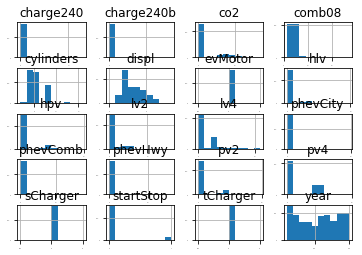

In [16]:
import matplotlib
import matplotlib.pyplot as plt
fuel.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)

C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


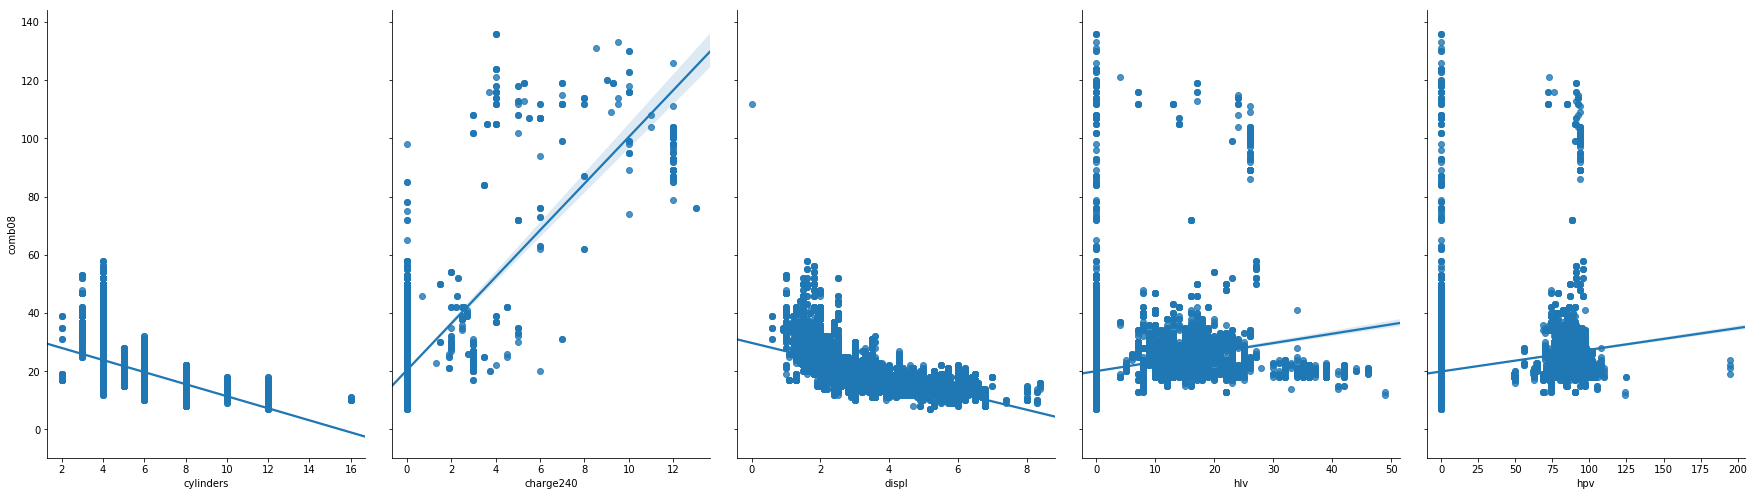

In [17]:
# Relationship between your X's and y
import seaborn as sns
%matplotlib inline
sns.pairplot(fuel, x_vars=['cylinders', 'charge240', 'displ', 'hlv', 'hpv'], y_vars='comb08', size=7, aspect=0.7, kind='reg')

C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


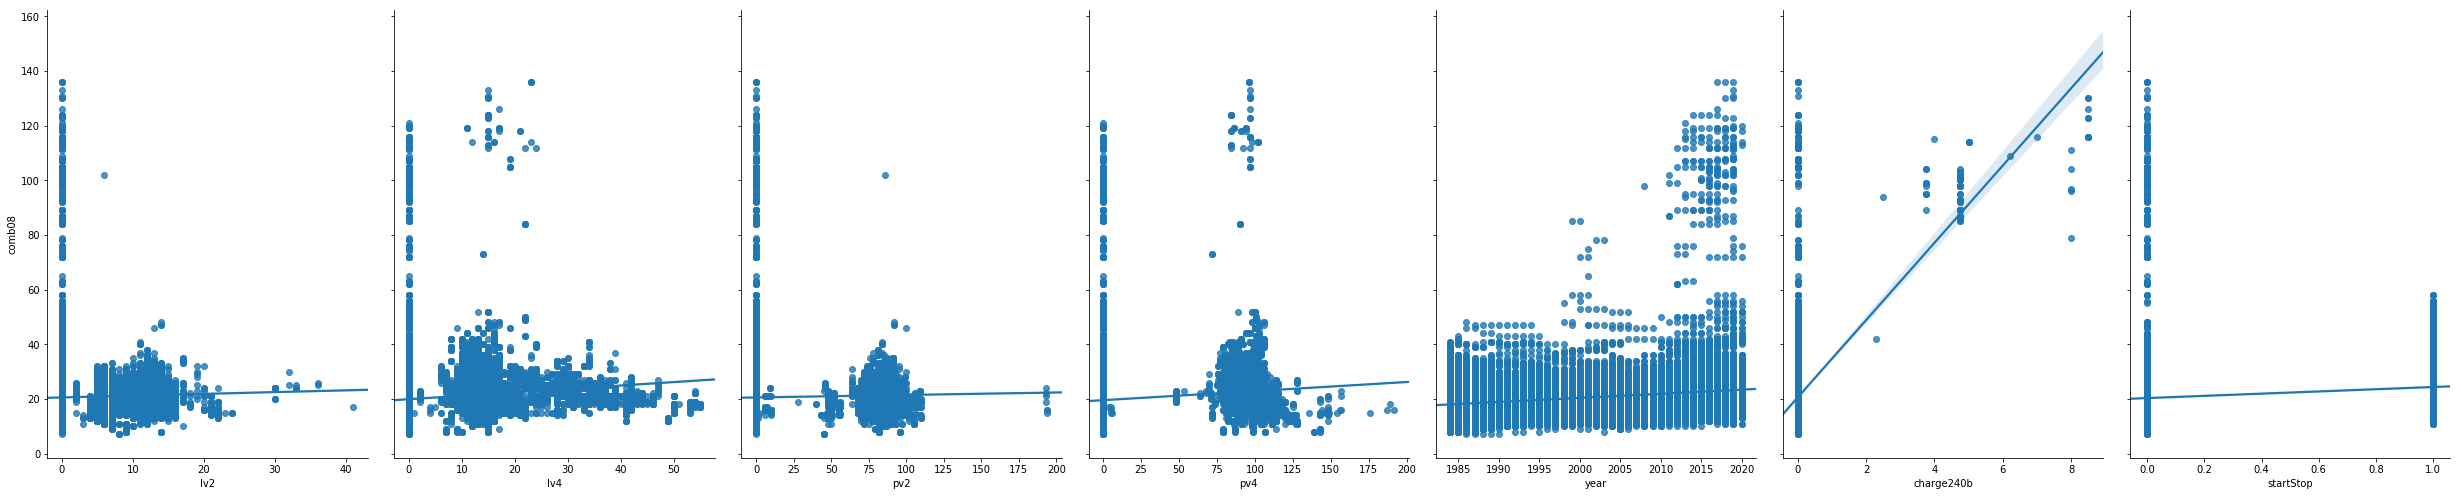

In [18]:
%matplotlib inline
sns.pairplot(fuel, x_vars=['lv2', 'lv4', 'pv2', 'pv4','year', 'charge240b', 'startStop'], y_vars='comb08', size=7, aspect=0.7, kind='reg')

C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


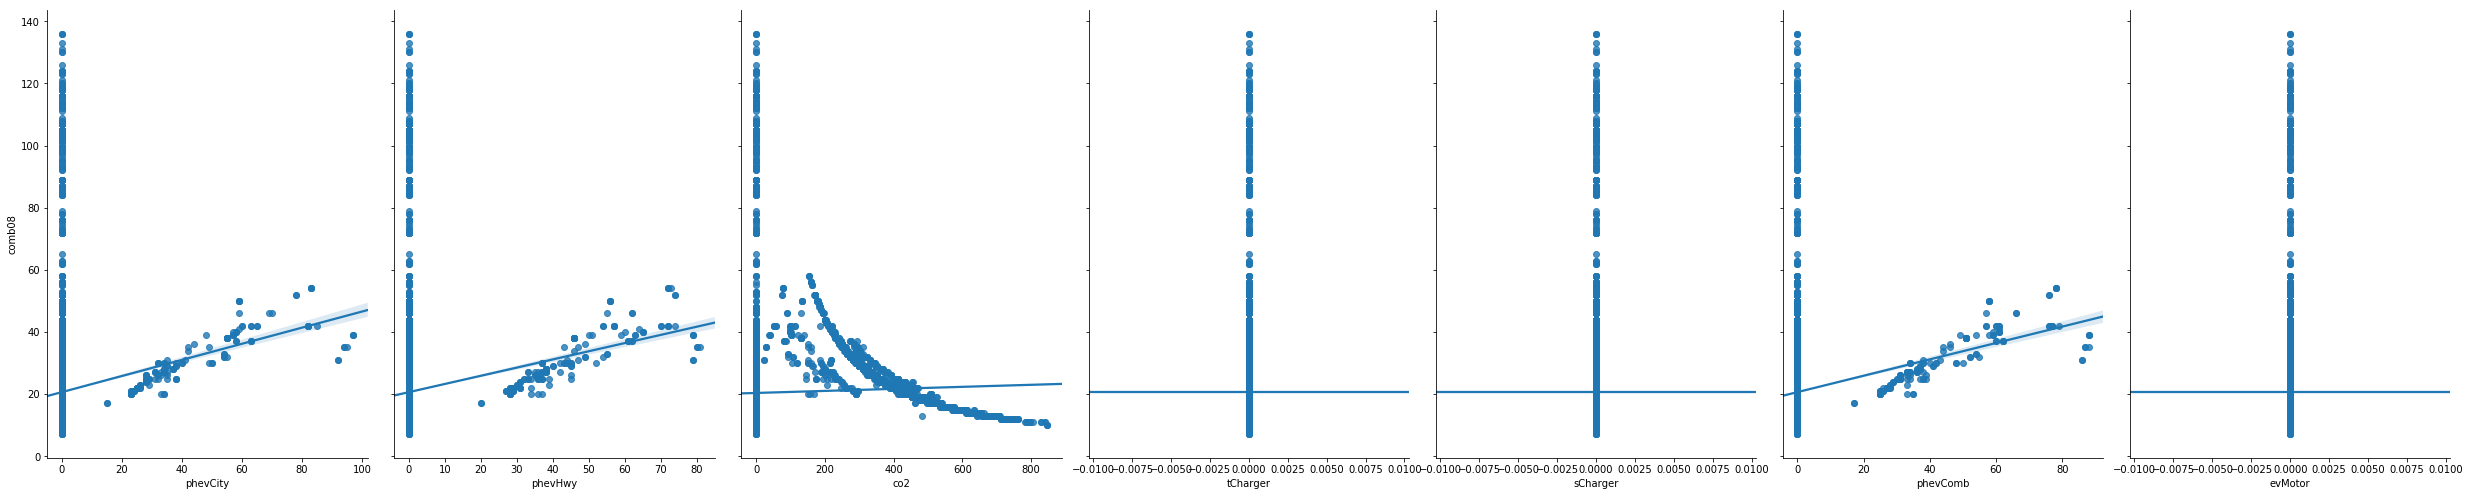

In [19]:
%matplotlib inline
sns.pairplot(fuel, x_vars=['phevCity', 'phevHwy', 'co2', 'tCharger', 'sCharger', 'phevComb', 'evMotor'], y_vars='comb08', size=7, aspect=0.7, kind='reg')

In [20]:
fuel = fuel.drop(['co2', 'year', 'charge240b', 'charge240', 'cylinders', 'tCharger', 'sCharger', 'startStop', 'evMotor',
                 'hlv', 'hpv'], axis=1)
fuel.head()

,comb08,displ,lv2,lv4,pv2,pv4,phevCity,phevHwy,phevComb
0,21,2.0,0,0,0,0,0,0,0
1,11,4.9,0,0,0,0,0,0,0
2,27,2.2,0,0,0,0,0,0,0
3,11,5.2,0,0,0,0,0,0,0
4,19,2.2,0,14,0,90,0,0,0


In [21]:
fuel.isnull().sum()

comb08        0
displ       211
lv2           0
lv4           0
pv2           0
pv4           0
phevCity      0
phevHwy       0
phevComb      0
dtype: int64

In [22]:
fuel = fuel.drop(['displ'], axis=1)
fuel.head()

,comb08,lv2,lv4,pv2,pv4,phevCity,phevHwy,phevComb
0,21,0,0,0,0,0,0,0
1,11,0,0,0,0,0,0,0
2,27,0,0,0,0,0,0,0
3,11,0,0,0,0,0,0,0
4,19,0,14,0,90,0,0,0


In [23]:
from sklearn import model_selection

feature_cols = ['lv2', 'lv4', 'pv2', 'pv4', 'phevCity', 'phevHwy', 'phevComb']
X = fuel[feature_cols]
y = target = np.where(fuel['comb08'] >= 25, 1, 0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.3,random_state=0)

In [72]:
for col, coef in zip(X_train.columns, dtc.feature_importances_.flatten().tolist()):
    print(col, coef)

lv2 0.08254592974309279
lv4 0.2627476483058664
pv2 0.11906453388445737
pv4 0.5109566365216212
phevCity 0.0
phevHwy 0.024685251544962306
phevComb 0.0


In [26]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
from sklearn import metrics
from sklearn.metrics import classification_report
ypredict=knn.predict(X_test)
print(metrics.confusion_matrix(y_test, ypredict))
print("Accuracy Score =", metrics.accuracy_score(y_test, ypredict))

[[9784  498]
 [1404  871]]
Accuracy Score = 0.8485307000079637


In [31]:
# Logistic Regression Sample Code
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
ypredict=logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, ypredict))
print("Accuracy Score =", metrics.accuracy_score(y_test, ypredict))

[[10274     8]
 [ 2244    31]]
Accuracy Score = 0.820657800430039


In [34]:
#Decision Tree
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 20)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
ypredict=dtc.predict(X_test)
print(metrics.confusion_matrix(y_test, ypredict))
print("Accuracy Score =", metrics.accuracy_score(y_test, ypredict))

[[9974  308]
 [1558  717]]
Accuracy Score = 0.8513976268216931


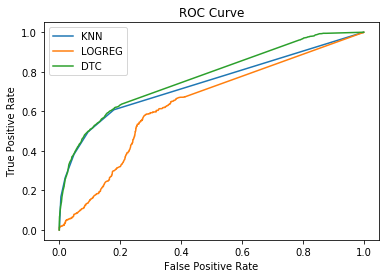

KNN:  0.7397097028627859
LOGREG:  0.6417751709484835
DTC:  0.7722074210558941


In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])

plt.plot(fpr_knn, tpr_knn, label = 'KNN')
plt.plot(fpr_logreg, tpr_logreg, label = 'LOGREG')
plt.plot(fpr_dtc, tpr_dtc, label = 'DTC')
plt.legend()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("KNN: ",roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))
print("LOGREG: ",roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))
print("DTC: ",roc_auc_score(y_test, dtc.predict_proba(X_test)[:,1]))